<a href="https://colab.research.google.com/github/Vlxn761/redshift-fotometrico/blob/main/Red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Montaje


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_archivo ='/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/Redshift con sigma final.csv'
data = pd.read_csv(path_archivo, skiprows=[0])

In [ ]:
redshift = data['redshift']
redshift_err = data['zerr']
(u, g, r, i, z) = data['u'], data['g'], data['r'], data['i'], data['z']

In [ ]:
datos = np.array([u, g, r, i, z]).T

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datos, redshift, test_size=.25)

In [ ]:
# Forma de cada set
print(f'X_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')
print(f'X_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')

X_test: (125000, 5)
y_test: (125000,)
X_train: (375000, 5)
y_train: (375000,)


## Primer modelo

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)), # What shape will have the data that the model receives
    tf.keras.layers.Dense(units=1), # What shape should have the output
], name='model1' # And we can allways give our model a name
)

# we can always visualize the model's arquitecture like this
model1.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

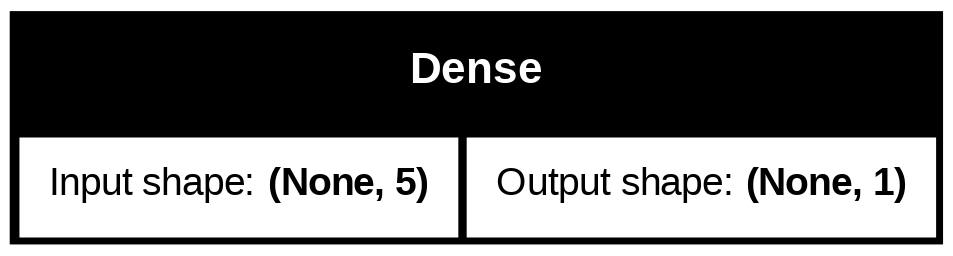

In [ ]:
# Or by using the plot_model function, tho here's its quite lame
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
t0 = time.time()
# Here we train the model.
hist1 = model1.fit(x_train, y_train, epochs=25, batch_size=32, verbose=2, validation_split=0.25)
trainning_time_model1 = time.time() - t0

Epoch 1/25


In [ ]:
model1_loss = model1.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 loss: {model1_loss}")


In [ ]:
for sas in range(360000,360016):

    print("")
    print("Redshift real:", redshift[sas])
    print("Redshift modelo:", model1.predict(np.array([datos[sas]]), verbose=0)[0][0])
    print("Error:", abs(redshift[sas] - model1.predict(np.array([datos[sas]]), verbose=0)[0][0]))
    print(f"u: {u[sas]}, g: {g[sas]}, r: {r[sas]}, i: {i[sas]}, z: {z[sas]}")
    print("")

In [ ]:
model1.save("/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/ Modelo1.keras")

## Modelo 2

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)), #Input shape
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="linear") # Output shape
], name='model2')

model2.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

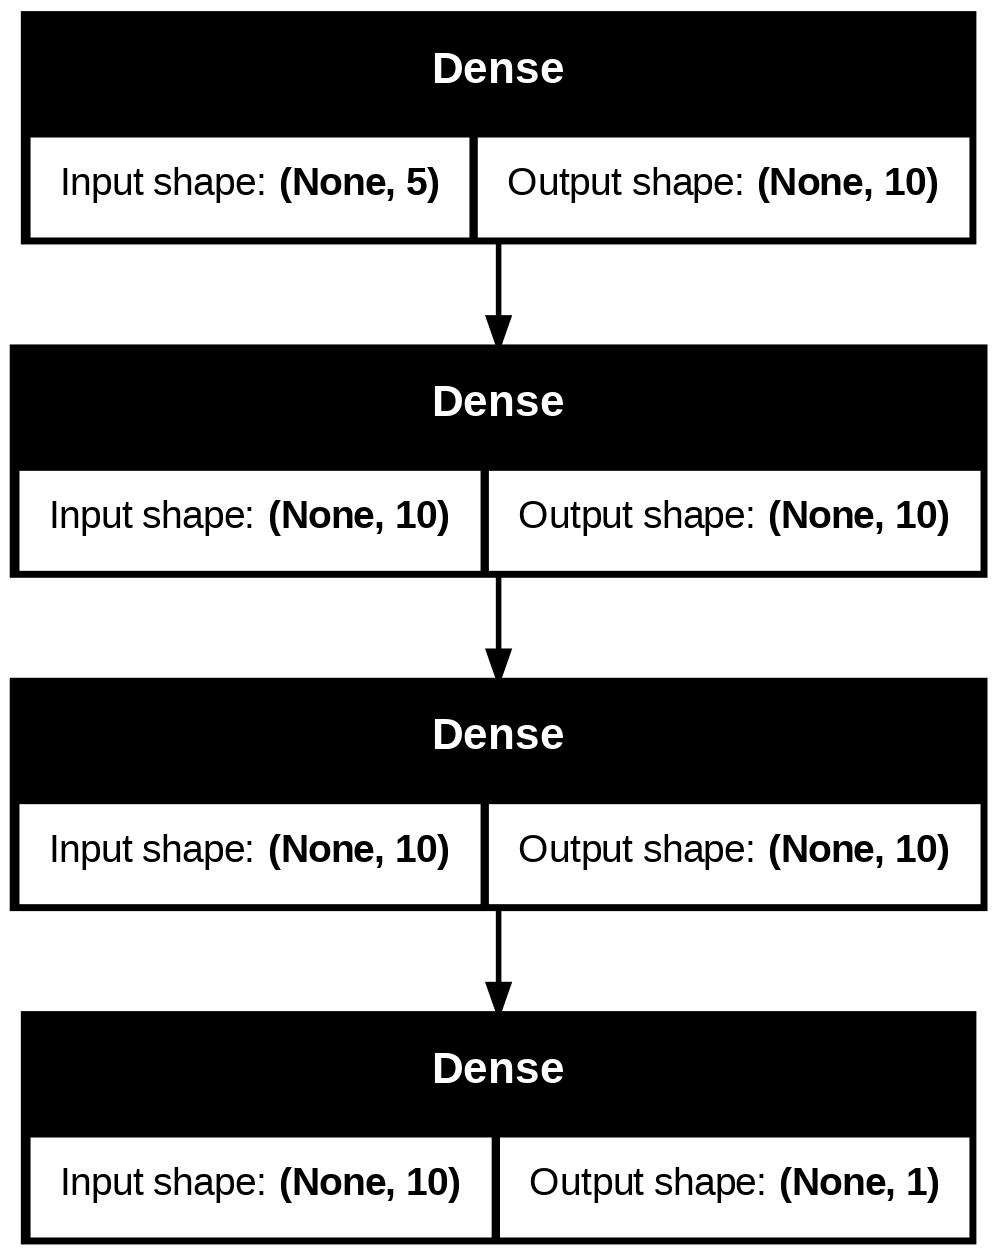

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
t0 = time.time()
# Here we train the model.
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2, validation_split=0.25)
trainning_time_model2 = time.time() - t0

Epoch 1/50
1099/1099 - 4s - 4ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 2/50
1099/1099 - 4s - 4ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3/50
1099/1099 - 2s - 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 4/50
1099/1099 - 3s - 3ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 5/50
1099/1099 - 2s - 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 6/50
1099/1099 - 3s - 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 7/50
1099/1099 - 2s - 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 8/50
1099/1099 - 2s - 2ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 9/50
1099/1099 - 3s - 3ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 10/50
1099/1099 - 3s - 3ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 11/50
1099/1099 - 2s - 2ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 12/50
1099/1099 - 2s - 2ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 13/50
1099/1099 - 2s - 2ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 14/50
1099/1099 - 3s - 2ms/step - loss: 0.0048 - val_loss: 0.0050
E

In [ ]:
model2_loss = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 2 loss: {model2_loss}")

Model 2 loss: 0.004833619110286236


In [ ]:
for n in range(360000,360016):

    print("")
    print("Redshift real:", redshift[n])
    print("Redshift modelo:", model2.predict(np.array([datos[n]]), verbose=0)[0][0])
    print("Error:", abs(redshift[n] - model2.predict(np.array([datos[n]]), verbose=0)[0][0])/redshift[n])
    print(f"u: {u[n]}, g: {g[n]}, r: {r[n]}, i: {i[n]}, z: {z[n]}")
    print("")

#N = len(range(0,100))
#for n in range(0, 100):




Redshift real: 0.592242
Redshift modelo: 0.5509976
Error: 0.06964110133942776
u: 26.50188, g: 22.45499, r: 20.471, i: 19.43219, z: 18.82457


Redshift real: 0.02432023
Redshift modelo: 0.013451554
Error: 0.44689857451313725
u: 16.44762, g: 14.51279, r: 13.62618, i: 13.15896, z: 12.74818


Redshift real: 0.1540332
Redshift modelo: 0.106024645
Error: 0.31167666925755566
u: 19.60413, g: 18.20395, r: 17.3629, i: 16.90817, z: 16.56761


Redshift real: 0.07161378
Redshift modelo: 0.09642378
Error: 0.346441738004019
u: 19.92661, g: 18.5752, r: 17.9343, i: 17.59997, z: 17.34752


Redshift real: 0.5108507
Redshift modelo: 0.52706647
Error: 0.03174267783621495
u: 25.35246, g: 22.15453, r: 20.77458, i: 19.83638, z: 19.32949


Redshift real: 0.3421539
Redshift modelo: 0.37092483
Error: 0.08408768813304929
u: 25.7112, g: 20.96655, r: 18.98761, i: 18.3133, z: 17.95132


Redshift real: 0.08362263
Redshift modelo: 0.09852009
Error: 0.17815108979649572
u: 19.77063, g: 17.7451, r: 16.76624, i: 16.30623

In [ ]:
predict = model2.predict(datos, verbose=0)
predict = np.array([x[0] for x in predict])

In [ ]:
z_real = redshift.to_numpy()

In [ ]:
np.min(z_real)

4.481213e-07

In [ ]:
error = np.abs(z_real - predict)

In [ ]:
error_pc = error/z_real

In [ ]:
error_pc.argmax()

224042

In [ ]:
print(error[224042])
print(z_real[224042])
print(error[224042]/z_real[224042])

0.15253552685810062
4.481213e-07
340388.9233966353


In [ ]:
np.sort(error/z_real)[-10000:-9900]

array([1.16556599, 1.16561527, 1.16564809, 1.1656558 , 1.16579214,
       1.1658053 , 1.16588737, 1.16598648, 1.16599905, 1.1664193 ,
       1.16642564, 1.1664631 , 1.16650434, 1.16670836, 1.16674888,
       1.1667984 , 1.16681063, 1.16686999, 1.16704218, 1.16716695,
       1.16717828, 1.16728007, 1.16738773, 1.16738814, 1.16747146,
       1.1674743 , 1.16750578, 1.16754413, 1.16761104, 1.16761821,
       1.16766653, 1.16767216, 1.16784688, 1.16788894, 1.1679426 ,
       1.16802258, 1.16806815, 1.16809311, 1.16817902, 1.16833266,
       1.16852983, 1.16853612, 1.16857964, 1.16860954, 1.16866387,
       1.16867681, 1.16889939, 1.16910145, 1.1691577 , 1.16923466,
       1.16930466, 1.16944861, 1.1694902 , 1.16950872, 1.16951013,
       1.16955368, 1.16967787, 1.16975803, 1.16978268, 1.17003571,
       1.17009314, 1.17016661, 1.17033277, 1.17034132, 1.1704468 ,
       1.17057526, 1.17070128, 1.17081556, 1.1708949 , 1.17108306,
       1.17124844, 1.17130249, 1.17133419, 1.17140258, 1.17140

In [ ]:
np.sort(error/z_real)[:10]

array([2.58242295e-07, 9.18982638e-07, 1.00607277e-06, 1.05920498e-06,
       1.17843678e-06, 1.52324309e-06, 1.56870999e-06, 2.12848688e-06,
       2.18053077e-06, 2.32847685e-06])

In [ ]:
model2.save("/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/ Modelo2.keras")